In [106]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('D:/python/titanic/train.csv')

In [108]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
df.shape

(891, 12)

In [110]:
round(df.describe(), 2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [112]:
df.sample(2) # random sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C


In [113]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [114]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [115]:
# del df['Name']
# df['Name']=0

In [116]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [117]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


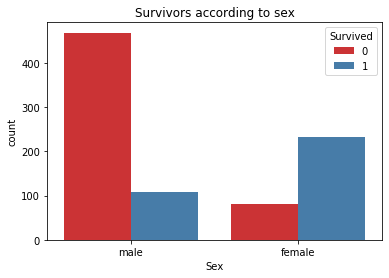

In [118]:
ax = sns.countplot(x="Sex", hue="Survived", palette="Set1", data=df)
ax.set(title="Survivors according to sex", xlabel="Sex", label="Total")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


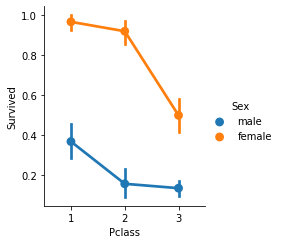

In [119]:
sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=df, aspect=0.9, size=3.5)
plt.show()

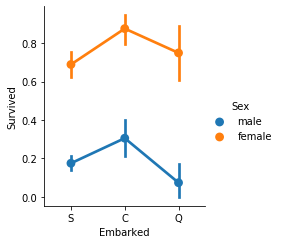

In [120]:
sns.factorplot(x="Embarked", y="Survived", hue="Sex", data=df, aspect=0.9, size=3.5)
plt.show()

# 4 Cs in DS
- Correcting
- Completing (null)
- Creating (new feature)
- Converting (categorical names -> numbers etc)

## Correcting

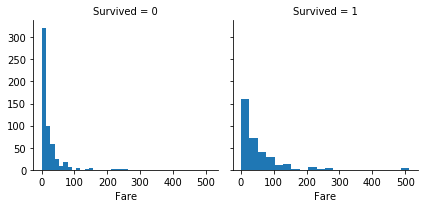

In [121]:
graph = sns.FacetGrid(df, col="Survived")
graph.map(plt.hist, "Fare", bins=20)

In [122]:
df.loc[df['Fare'] > 400, "Fare"] = df["Fare"].median()

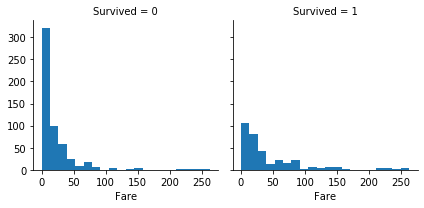

In [123]:
graph = sns.FacetGrid(df, col="Survived")
graph.map(plt.hist, "Fare", bins=20)

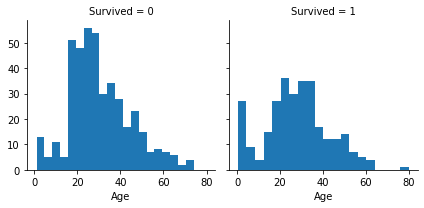

In [124]:
graph_age = sns.FacetGrid(df, col="Survived")
graph_age.map(plt.hist, "Age", bins=20)

In [125]:
df.loc[df["Age"] > 70, "Age"] = 70

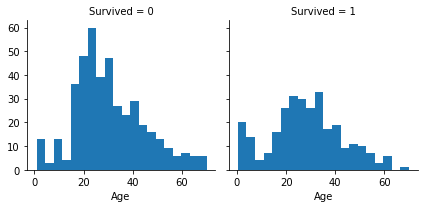

In [126]:
graph_age = sns.FacetGrid(df, col="Survived")
graph_age.map(plt.hist, "Age", bins=20)

## Completing

In [127]:
for column in df:
    print(column, ":", df[column].isnull().sum())

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2


In [128]:
df["Age"].fillna(df["Age"].median(), inplace=True)

In [129]:
df["Age"].isnull().sum()

0

In [130]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [131]:
df["Embarked"].fillna("S", inplace=True)

In [132]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

## Creating

In [133]:
df['Name'].sample(20)

286                     de Mulder, Mr. Theodore
65                     Moubarek, Master. Gerios
661                           Badt, Mr. Mohamed
298                       Saalfeld, Mr. Adolphe
148    Navratil, Mr. Michel ("Louis M Hoffman")
357                   Funk, Miss. Annie Clemmer
479                    Hirvonen, Miss. Hildur E
119           Andersson, Miss. Ellis Anna Maria
7                Palsson, Master. Gosta Leonard
732                        Knight, Mr. Robert J
529                 Hocking, Mr. Richard George
139                          Giglio, Mr. Victor
464                          Maisner, Mr. Simon
734                Troupiansky, Mr. Moses Aaron
467                  Smart, Mr. John Montgomery
266                   Panula, Mr. Ernesti Arvid
122                        Nasser, Mr. Nicholas
784                            Ali, Mr. William
588                       Gilinski, Mr. Eliezer
388                        Sadlier, Mr. Matthew
Name: Name, dtype: object

In [134]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return "No title"

In [135]:
titles = set([x for x in df.Name.map(lambda x: get_title(x))])
print(titles)

{'Mrs', 'Mr', 'Col', 'Major', 'Ms', 'Jonkheer', 'Master', 'Lady', 'Mme', 'Mlle', 'the Countess', 'Rev', 'Sir', 'Dr', 'Don', 'Capt', 'Miss'}


In [136]:
# my code
titles2 = set([get_title(x) for x in df.Name])
print(titles2)

{'Mrs', 'Mr', 'Col', 'Major', 'Ms', 'Jonkheer', 'Master', 'Lady', 'Mme', 'Mlle', 'the Countess', 'Rev', 'Sir', 'Dr', 'Don', 'Capt', 'Miss'}


In [137]:
def shorter_titles(x):
    title = x["Title"]
    if title in ['Capt', 'Col', 'Major']:
        return 'Officer'
    elif title in ['Jonkheer', 'Don', 'Dona', 'the Countess', 'Lady', 'Sir']:
        return 'Royalty'
    elif title == 'Mme':
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    else:
        return title

In [138]:
df['Title'] = df['Name'].map(lambda x: get_title(x))

In [139]:
df['Title'] = df.apply(shorter_titles, axis=1)

In [140]:
df['Title'].value_counts()

Mr         517
Miss       185
Mrs        126
Master      40
Dr           7
Rev          6
Officer      5
Royalty      5
Name: Title, dtype: int64

In [141]:
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

In [142]:
df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
415,416,0,3,female,28.0,0,0,8.0500,NaN,S,Mrs
773,774,0,3,male,28.0,0,0,7.2250,NaN,C,Mr
474,475,0,3,female,22.0,0,0,9.8375,NaN,S,Miss
131,132,0,3,male,20.0,0,0,7.0500,NaN,S,Mr
818,819,0,3,male,43.0,0,0,6.4500,NaN,S,Mr
66,67,1,2,female,29.0,0,0,10.5000,F33,S,Mrs
314,315,0,2,male,43.0,1,1,26.2500,NaN,S,Mr
833,834,0,3,male,23.0,0,0,7.8542,NaN,S,Mr
613,614,0,3,male,28.0,0,0,7.7500,NaN,Q,Mr
888,889,0,3,female,28.0,1,2,23.4500,NaN,S,Miss


## Converting

In [143]:
df.Sex.replace(('male', 'female'), (0, 1), inplace=True)

In [145]:
df.sample(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
281,282,0,3,0,28.0,0,0,7.8542,NaN,S,Mr
707,708,1,1,0,42.0,0,0,26.2875,E24,S,Mr
633,634,0,1,0,28.0,0,0,0.0000,NaN,S,Mr
369,370,1,1,1,24.0,0,0,69.3000,B35,C,Mrs


In [149]:
set(df.Title.values)

{'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Rev', 'Royalty'}

In [150]:
df.Embarked.replace(('S', 'C', 'Q'), (0, 1, 2), inplace=True)
df.Title.replace(('Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Rev', 'Royalty'), (0, 1, 2, 3, 4, 5, 6, 7), inplace=True)

In [152]:
df.sample(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
147,148,0,3,1,9.0,2,2,34.3750,NaN,0,2
178,179,0,2,0,30.0,0,0,13.0000,NaN,0,3
38,39,0,3,1,18.0,2,0,18.0000,NaN,0,2
412,413,1,1,1,33.0,1,0,90.0000,C78,2,2
765,766,1,1,1,51.0,1,0,77.9583,D11,0,4
3,4,1,1,1,35.0,1,0,53.1000,C123,0,4
65,66,1,3,0,28.0,1,1,15.2458,NaN,1,1
589,590,0,3,0,28.0,0,0,8.0500,NaN,0,3
382,383,0,3,0,32.0,0,0,7.9250,NaN,0,3
450,451,0,2,0,36.0,1,2,27.7500,NaN,0,3
